In [29]:
import osmnx as ox
import networkx as nx
import math
import matplotlib.pyplot as plt
import heapq
import time

Nodo 182464536: [(4341725685, 29.889777283776706), (1826770721, 62.450344737452504), (471056823, 166.20584536350154)]
Nodo 4341725685: [(182464536, 29.889777283776706), (471054674, 239.22970584823875), (1752585700, 178.12999297783915)]
Nodo 1826770721: [(182464536, 62.450344737452504), (3317923763, 164.7691475022448), (5415149079, 99.25198434601569), (5415149079, 99.25198434601569)]
Nodo 411672133: [(411672134, 14.93901242291622), (411672163, 12.883038499046666)]
Nodo 411672134: [(411672133, 14.93901242291622), (411672135, 85.73985873012761), (411672164, 13.325611710664717)]


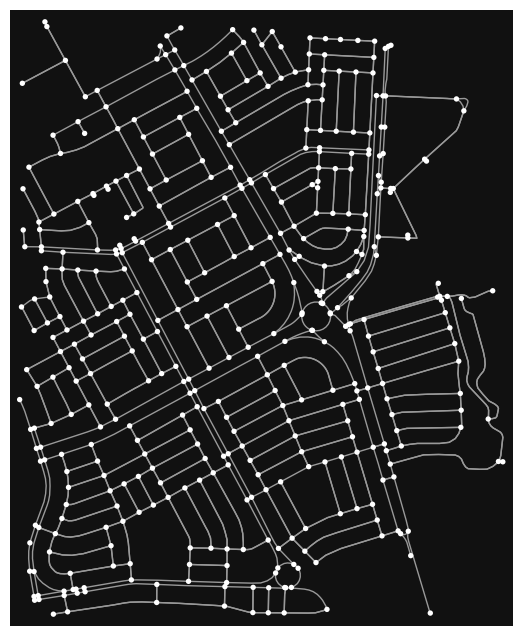

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [30]:


# centro de la región de interés
#center = (-12.104677069538884, -76.9612173767454)
center = (-12.064631, -76.940060) # ovalo monumental

distance = 1000 
graph = ox.graph_from_point(center, dist=distance, network_type='drive')

# Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 1000  
    return distance

# lista de adyacencia
adj_list = {}
for u, v, data in graph.edges(data=True):
    if u not in adj_list:
        adj_list[u] = []
    if v not in adj_list:
        adj_list[v] = []

    u_lat, u_lon = graph.nodes[u]['y'], graph.nodes[u]['x']
    v_lat, v_lon = graph.nodes[v]['y'], graph.nodes[v]['x']
    distance = haversine(u_lat, u_lon, v_lat, v_lon)

    adj_list[u].append((v, distance))
    adj_list[v].append((u, distance))  


for node in list(adj_list)[:5]:
    print(f"Nodo {node}: {adj_list[node]}")


ox.plot_graph(graph)


In [31]:
len(adj_list.keys())

432

BFS traversal:
Visited 268661716
Visited 268661721
Visited 10846811656
Visited 269398412
Visited 268661726
Visited 269398413
Visited 4073882927
Visited 268661729
Visited 308558748
Visited 308604743
Visited 268661731
Visited 308558887
Visited 308558884
Visited 308558750
Visited 308604867
Visited 4130706914
Visited 4273879794
Visited 7914568191
Visited 308604725
Visited 268721295
Visited 308558723
Visited 4284994836
Visited 308558891
Visited 11182833668
Visited 11176121823
Visited 308604983
Visited 5709716423
Visited 6361163911
Visited 4273879795
Visited 269396110
Visited 11182456153
Visited 7914568189
Visited 268721294
Visited 308605746
Visited 3675730432
Visited 308558739
Visited 11182426558
Visited 7914568194
Visited 308558893
Visited 308558753
Visited 11182833666
Visited 308604946
Visited 11176122274
Visited 308604988
Visited 308604922
Visited 11182251743
Visited 308605066
Visited 6361163917
Visited 269396489
Visited 11182456152
Visited 308558722
Visited 308605751
Visited 2678970630


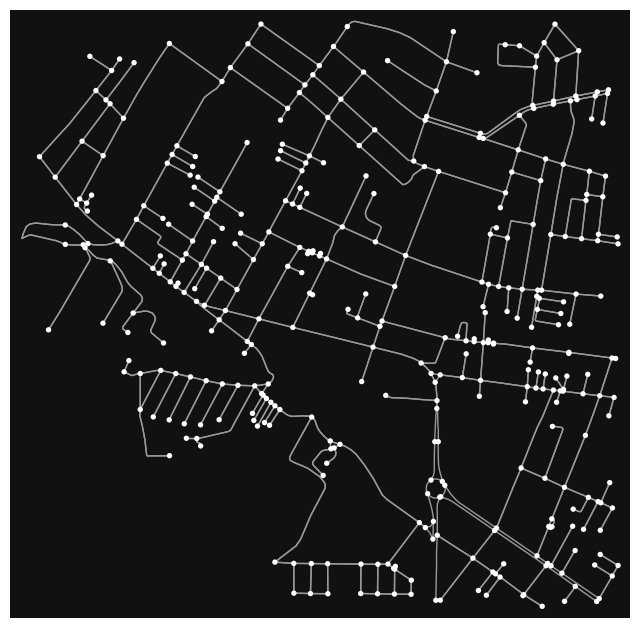

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [32]:

from queue import Queue, LifoQueue


center = (0.0012179546606783823, -78.45637017469987)  # mitad del mubdo Quito              

distance = 1000 
graph = ox.graph_from_point(center, dist=distance, network_type='drive')

# lista de adyacencia
adj_list = {node: list(graph.neighbors(node)) for node in graph.nodes}

def bfs(graph, start):
    visited = set()
    queue = Queue()
    queue.put(start)
    visited.add(start)

    while not queue.empty():
        node = queue.get()
        print(f"Visited {node}")
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.put(neighbor)

def dfs(graph, start):
    visited = set()
    stack = LifoQueue()
    stack.put(start)
    visited.add(start)

    while not stack.empty():
        node = stack.get()
        print(f"Visited {node}")
        
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.put(neighbor)

# nodo inicial 
start_node = list(adj_list.keys())[0]

print("BFS traversal:")
bfs(adj_list, start_node)

print("\nDFS traversal:")
dfs(adj_list, start_node)

ox.plot_graph(graph)


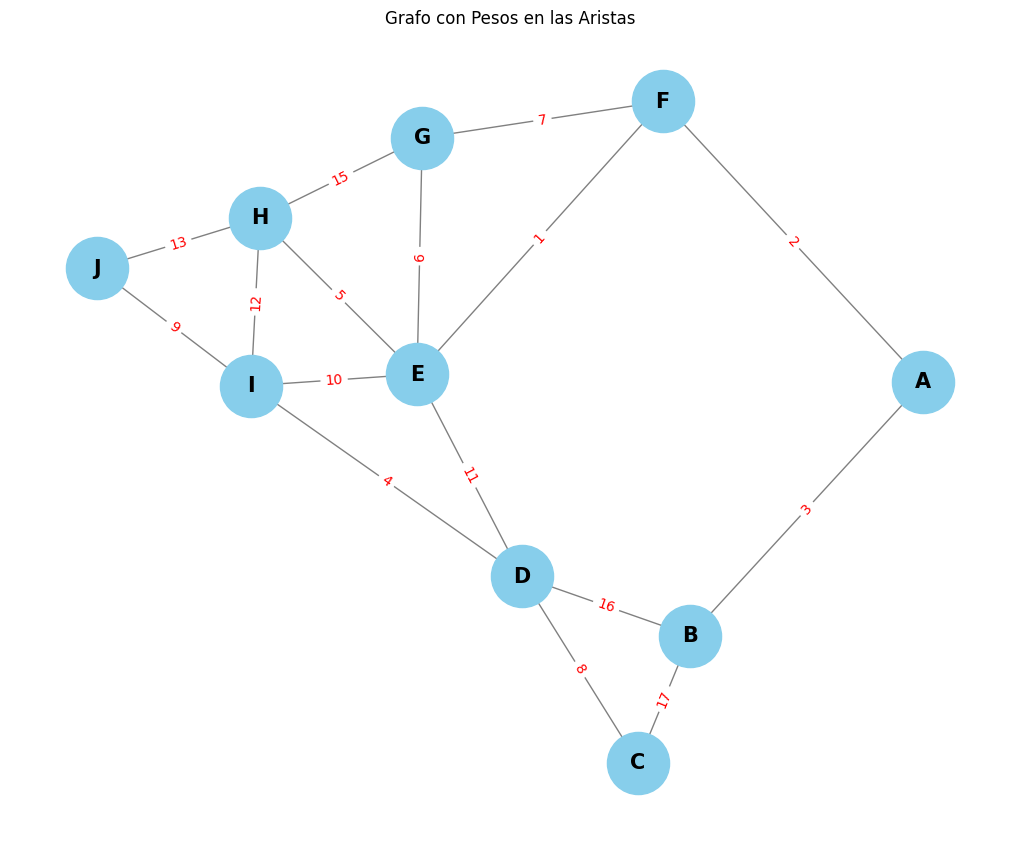

In [33]:



graph = {
    'A': [('B', 3), ('F', 2)],
    'B': [('A', 3), ('C', 17), ('D', 16)],
    'C': [('B', 17), ('D', 8)],
    'D': [('B', 16), ('C', 8), ('E', 11), ('I', 4)],
    'E': [('D', 11), ('F', 1), ('G', 6), ('H', 5), ('I', 10)],
    'F': [('A', 2), ('E', 1), ('G', 7)],
    'G': [('E', 6), ('F', 7), ('H', 15)],
    'H': [('E', 5), ('G', 15), ('I', 12), ('J', 13)],
    'I': [('D', 4), ('E', 10), ('H', 12), ('J', 9)],
    'J': [('H', 13), ('I', 9)]
}

G = nx.Graph()


for node, edges in graph.items():
    for edge in edges:
        G.add_edge(node, edge[0], weight=edge[1])


pos = nx.spring_layout(G)


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')


edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.title("Grafo con Pesos en las Aristas")
plt.show()




In [34]:
def prim(graph, start):
    mst = []
    visited = set()
    edges = [(0, start, start)]

    while edges:
        weight, u, v = heapq.heappop(edges)
        if v in visited:
            continue
        visited.add(v)
        if u != v:
            mst.append((u, v, weight))

        for next_v, next_weight in graph[v]:
            if next_v not in visited:
                heapq.heappush(edges, (next_weight, v, next_v))
                
        
        print(f"Current MST: {mst}")

    return mst


start_node = 'A'
print(f"Starting Prim's algorithm from node {start_node}\n")
mst = prim(graph, start_node)

print("\nFinal MST:")
for edge in mst:
    print(edge)


Starting Prim's algorithm from node A

Current MST: []
Current MST: [('A', 'F', 2)]
Current MST: [('A', 'F', 2), ('F', 'E', 1)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5), ('E', 'G', 6)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5), ('E', 'G', 6), ('E', 'I', 10)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5), ('E', 'G', 6), ('E', 'I', 10), ('I', 'D', 4)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5), ('E', 'G', 6), ('E', 'I', 10), ('I', 'D', 4), ('D', 'C', 8)]
Current MST: [('A', 'F', 2), ('F', 'E', 1), ('A', 'B', 3), ('E', 'H', 5), ('E', 'G', 6), ('E', 'I', 10), ('I', 'D', 4), ('D', 'C', 8), ('I', 'J', 9)]

Final MST:
('A', 'F', 2)
('F', 'E', 1)
('A', 'B', 3)
('E', 'H', 5)
('E', 'G', 6)
('E', 'I', 10)
('I', 'D', 4)
('D', 'C', 8)
('I', 'J', 9)


In [35]:

def prim(graph, start):
    mst = []
    visited = set()
    edges = [(0, start, start)]

    while edges:
        weight, u, v = heapq.heappop(edges)
        if v in visited:
            continue
        visited.add(v)
        if u != v:
            mst.append((u, v, weight))

        for next_v, data in graph[v].items():
            next_weight = data.get('weight', data.get('length', 1))  
            if next_v not in visited:
                heapq.heappush(edges, (next_weight, v, next_v))

    return mst

def get_graph_from_location(center_point, distance):
    
    start_time = time.time()
    graph = ox.graph_from_point(center_point, dist=distance, network_type='drive')
    download_time = time.time() - start_time
    print(f"Tiempo de descarga del grafo: {download_time:.2f} segundos")

   
    start_time = time.time()
    undirected_graph = graph.to_undirected()
    undirected_graph = nx.convert_node_labels_to_integers(undirected_graph)
    subgraph = undirected_graph.subgraph(sorted(nx.connected_components(undirected_graph), key=len, reverse=True)[0])
    conversion_time = time.time() - start_time
    print(f"Tiempo de conversión del grafo: {conversion_time:.2f} segundos")
    
    return subgraph

def measure_prim_time(graph):
    start_node = list(graph.nodes())[0]
    start_time = time.time()
    mst = prim(graph, start_node)
    end_time = time.time()
    return mst, end_time - start_time

# puntos de interés
location1 = (-34.605767162618456, -58.43556727036311)   # Buenos Aires
location2 = (4.602782573057573, -74.07561373772161)     # Bogota
location3 = (0.0012179546606783823, -78.45637017469987) # Mitad del Mundo Quito


regions = [
    (location1, 1000), 
    (location2, 1500),
    (location3, 3000)
]

node_limits = [300, 700, 2000]

for i, ((location, distance), node_limit) in enumerate(zip(regions, node_limits), start=1):
    print(f"Procesando región {i} con un objetivo de {node_limit} nodos aproximados...")
    graph = get_graph_from_location(location, distance)
    if graph.number_of_nodes() > node_limit:
        subgraph_nodes = list(graph.nodes)[:node_limit]
        graph = graph.subgraph(subgraph_nodes)
    print(f"Nodos en la región {i}: {graph.number_of_nodes()}")
    mst, time_taken = measure_prim_time(graph)
    print(f"Tiempo de procesamiento para región {i}: {time_taken:.2f} segundos\n")


Procesando región 1 con un objetivo de 300 nodos aproximados...
Tiempo de descarga del grafo: 1.14 segundos
Tiempo de conversión del grafo: 0.03 segundos
Nodos en la región 1: 300
Tiempo de procesamiento para región 1: 0.00 segundos

Procesando región 2 con un objetivo de 700 nodos aproximados...
Tiempo de descarga del grafo: 3.47 segundos
Tiempo de conversión del grafo: 0.23 segundos
Nodos en la región 2: 700
Tiempo de procesamiento para región 2: 0.00 segundos

Procesando región 3 con un objetivo de 2000 nodos aproximados...
Tiempo de descarga del grafo: 2.69 segundos
Tiempo de conversión del grafo: 0.20 segundos
Nodos en la región 3: 1622
Tiempo de procesamiento para región 3: 0.05 segundos

